In [ ]:
#emotion detection

In [4]:
#import libraries
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.18.0


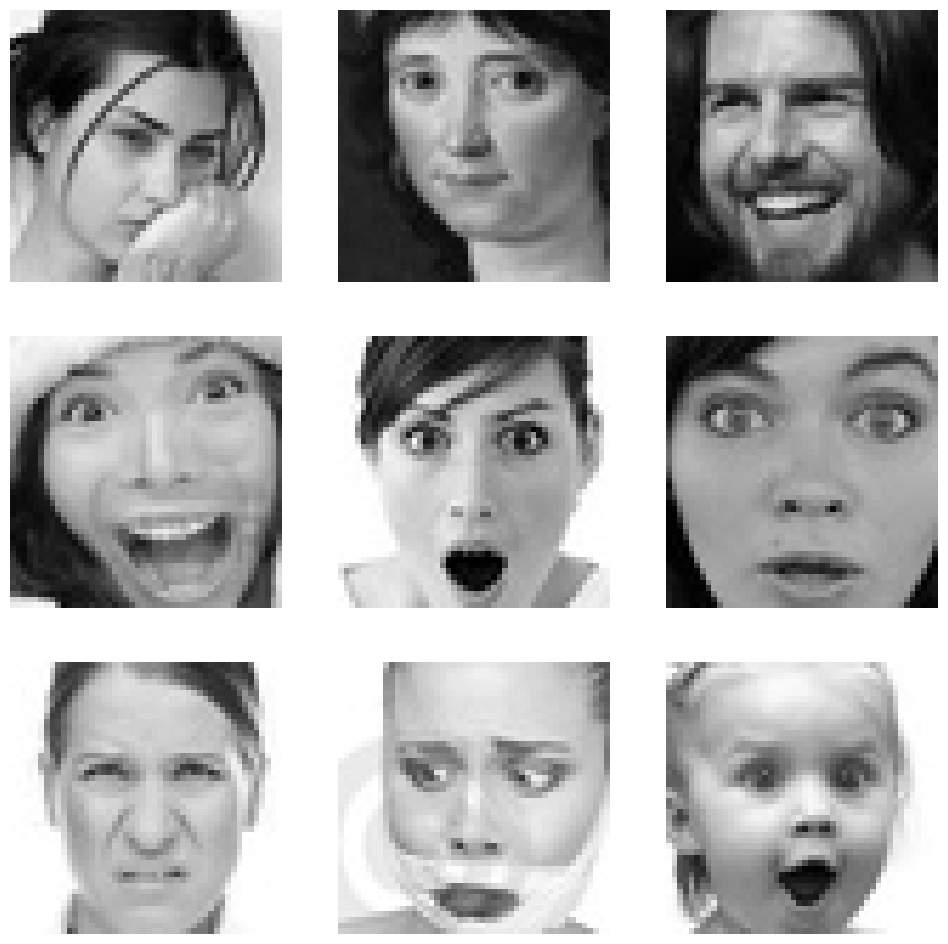

In [33]:
#exploring the dataset
images = glob("train/**/**")
plt.figure(figsize = (12,12))
for i in range(9):
    image = random.choice(images)
    plt.subplot(3,3,i + 1)
    plt.imshow(cv2.imread(image))
    plt.axis('off')

In [10]:
#preparing the data 

In [34]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",target_size = (img_size, img_size),color_mode = "grayscale", batch_size = batch_size, class_mode = "categorical", shuffle = True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_validation.flow_from_directory("test/",target_size = (img_size, img_size),color_mode = "grayscale", batch_size = batch_size, class_mode = "categorical", shuffle = True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [25]:
def Convolution(input_tensor , filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)

    return x

In [35]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(conv_1,64,(5,5))
    conv_3 = Convolution(conv_2,128,(3,3))

    flatten = Flatten()(conv_3)

    dense_1 = Dense(256, activation = 'relu')(flatten)

    output = Dense(7, activation = "softmax")(dense_1)
    model = Model(inputs=inputs,outputs=output)

    model.compile(loss='categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])
    return model

In [36]:
model = model_fer((img_size, img_size, 1))
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                ┃ Output Shape         ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)  │ (None, 48, 48, 1)    │           0 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ conv2d_15 (Conv2D)          │ (None, 48, 48, 32)   │         320 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ batch_normalization_15      │ (None, 48, 48, 32)   │         128 │
│ (BatchNormalization)        │                      │             │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ activation_15 (Activation)  │ (None, 48, 48, 32)   │           0 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ max_pooling2d_15            │ (None, 24, 24, 32)   │           0 │
│ (MaxPooling2D)              │                      │             │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ dropout_15 (Dropout)        │ (None, 24, 24, 32)   │           0 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ conv2d_16 (Conv2D)          │ (None, 24, 24, 64)   │      51,264 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ batch_normalization_16      │ (None, 24, 24, 64)   │         256 │
│ (BatchNormalization)        │                      │             │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ activation_16 (Activation)  │ (None, 24, 24, 64)   │           0 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ max_pooling2d_16            │ (None, 12, 12, 64)   │           0 │
│ (MaxPooling2D)              │                      │             │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ dropout_16 (Dropout)        │ (None, 12, 12, 64)   │           0 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ conv2d_17 (Conv2D)          │ (None, 12, 12, 128)  │      73,856 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ batch_normalization_17      │ (None, 12, 12, 128)  │         512 │
│ (BatchNormalization)        │                      │             │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ activation_17 (Activation)  │ (None, 12, 12, 128)  │           0 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ max_pooling2d_17            │ (None, 6, 6, 128)    │           0 │
│ (MaxPooling2D)              │                      │             │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ dropout_17 (Dropout)        │ (None, 6, 6, 128)    │           0 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ flatten_5 (Flatten)         │ (None, 4608)         │           0 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ dense_3 (Dense)             │ (None, 256)          │   1,179,904 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ dense_4 (Dense)             │ (None, 7)            │       1,799 │
└─────────────────────────────┴──────────────────────┴─────────────┘

 Total params: 1,308,039 (4.99 MB)

 Trainable params: 1,307,591 (4.99 MB)

 Non-trainable params: 448 (1.75 KB)

In [42]:
epochs = 15
steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps = validation_generator.n // validation_generator.batch_size

# Checkpoint callback
checkpoint = ModelCheckpoint(
    "model_weights.weights.h5",
    monitor='val_accuracy',
    save_weights_only=True,
    mode='max',
    verbose=1
)
callbacks = [checkpoint]

# Model training
model.fit(
    train_generator,
    epochs=epochs,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks
)

Epoch 1/15

Epoch 1: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 415s 916ms/step - accuracy: 0.2652 - loss: 2.4676 - val_accuracy: 0.3165 - val_loss: 1.7770
Epoch 2/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 2:24 323ms/step - accuracy: 0.4531 - loss: 1.5917

C:\Users\didor\anaconda3\envs\emotion_detection\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.4531 - loss: 1.5917 - val_accuracy: 0.3191 - val_loss: 1.7663
Epoch 3/15

Epoch 3: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 164s 366ms/step - accuracy: 0.3955 - loss: 1.5403 - val_accuracy: 0.4598 - val_loss: 1.4061
Epoch 4/15

Epoch 4: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.3906 - loss: 1.4209 - val_accuracy: 0.4637 - val_loss: 1.4004
Epoch 5/15

Epoch 5: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 162s 361ms/step - accuracy: 0.4599 - loss: 1.3997 - val_accuracy: 0.4622 - val_loss: 1.4072
Epoch 6/15

Epoch 6: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.5625 - loss: 1.1978 - val_accuracy: 0.4520 - val_loss: 1.4335
Epoch 7/15

Epoch 7: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 162s 361ms/ste

In [43]:
model.evaluate(validation_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 13s 117ms/step - accuracy: 0.5336 - loss: 1.2101


[1.2202284336090088, 0.5299526453018188]

Epoch 1/15

Epoch 1: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 167s 373ms/step - accuracy: 0.5770 - loss: 1.1252 - val_accuracy: 0.5603 - val_loss: 1.1579
Epoch 2/15

Epoch 2: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.6250 - loss: 1.0535 - val_accuracy: 0.5619 - val_loss: 1.1600
Epoch 3/15

Epoch 3: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 150s 335ms/step - accuracy: 0.5769 - loss: 1.1132 - val_accuracy: 0.5441 - val_loss: 1.1896
Epoch 4/15

Epoch 4: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.6250 - loss: 1.0977 - val_accuracy: 0.5434 - val_loss: 1.1945
Epoch 5/15

Epoch 5: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 168s 375ms/step - accuracy: 0.5924 - loss: 1.0779 - val_accuracy: 0.5488 - val_loss: 1.1945
Epoch 6/15

Epoch 6: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 

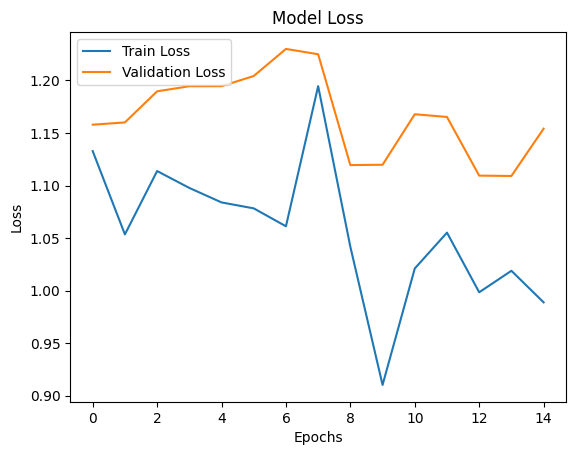

In [45]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15,  # Number of epochs
    callbacks=callbacks,  # Checkpoints or other callbacks
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    validation_steps=validation_generator.n // validation_generator.batch_size
)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')  # Plot training loss
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot validation loss

# Add title, labels, and legend
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left')

# Show the plot
plt.show()


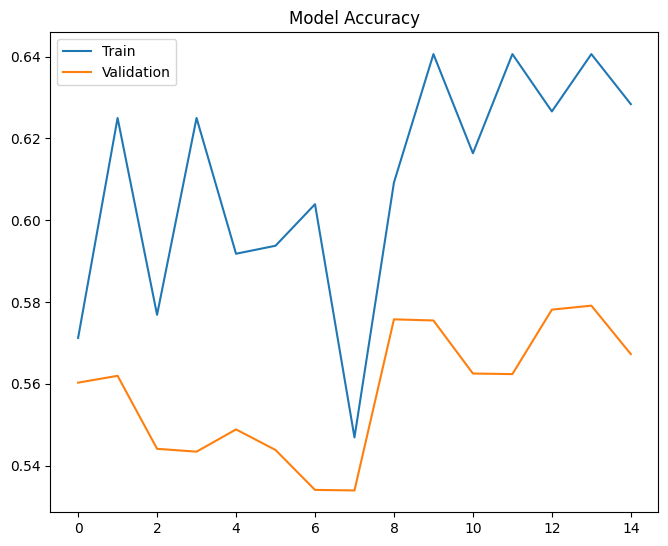

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)


In [47]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)